# Final Project

Now that you've been guided which experiment to run in assignment 2, you will be exploring on your own, trying to achieve the best accuracy for cifar10. 

In this notebook you will be asked to tune some hyperparameters, while it is recommended to tune additional hyperparameters to achieve high performance.

In addition, you will be asked to read some matirials by yourselves, summeraize some of them, and combine thier innovaitive ideas in your network.

You can use part of the data, in order to speed up the training, however, the **dataset size** you test on should be large. Use at least ~12000 training images and ~3000 validation images. The **batch size** parameter however is also up to you (you can increase it in order to speed up the training).

You can run the experiments from several notebooks, while you save the output files in the results dictionary (choose meaningful names) and use 'plot_exp_results' to plot it.

You may want to use loops in order to automatically run each section's experiments.

You will will submit this notebook, all relevant the python files and a report that summerize your attempts and results. Follow the instructions and answer the question in your report.

It is important to describe the hyperparameters you used, how you chose them, and how they affected your results.

**In each section write the best train val and test accuracy and loss.**

In [1]:
%pip install "pillow<7"
import os
import re
import sys
import glob
import numpy as np
import matplotlib.pyplot as plt
import unittest
import torch
import torchvision
import torchvision.transforms as tvtf
import torch.nn as nn
import torch.optim as optim


%matplotlib inline
%load_ext autoreload
%autoreload 2

seed = 42
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

plt.rcParams.update({'font.size': 12})
test = unittest.TestCase()

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
from utils import *
from  utils import models
import utils.experiments as experiments
from utils.experiments import load_experiment
from utils.plot import plot_fit
import utils.training as training
torch.manual_seed(seed)

In [3]:
def plot_exp_results(filename_pattern, results_dir='results'):
    fig = None
    result_files = glob.glob(os.path.join(results_dir, filename_pattern))
    result_files.sort()
    if len(result_files) == 0:
        print(f'No results found for pattern {filename_pattern}.', file=sys.stderr)
        return
    for filepath in result_files:
        m = re.match('exp\d_(\d_)?(.*)\.json', os.path.basename(filepath))
        cfg, fit_res = load_experiment(filepath)
        fig, axes = plot_fit(fit_res, fig, legend=m[2],log_loss=True)
    if 'filters_per_layer' in cfg:
        del cfg['filters_per_layer']
        del cfg['layers_per_block']
    print('common config: ', cfg)

## Build Your Own Achitecture

In [ ]:
data_dir = os.path.expanduser('~/.pytorch-datasets')
ds_train = torchvision.datasets.CIFAR10(root=data_dir, download=True, train=True, transform=tvtf.ToTensor())
ds_test = torchvision.datasets.CIFAR10(root=data_dir, download=True, train=False, transform=tvtf.ToTensor())

print(f'Train: {len(ds_train)} samples')
print(f'Test: {len(ds_test)} samples')

x0,_ = ds_train[0]
in_size = x0.shape
num_classes = 10
print('input image size =', in_size)

### 1. Implement YourCodeNet model
Implement YourCodeNet model in utiles/models and define the model architecture (use your previouse assignment's insights).
Define `filters_per_layer`, `layers_per_block` and `hidden_dims` which you believe are the best for this task. You can run some experiments in order to set these hyperparameters.

To make the experiment runner use your custom network model, remember to set ycn=True when you call experiments.run_experiment(...).


In [ ]:
# Just to see that the model run
net = models.YourCodeNet((3,100,100), 10, filters=[32]*4, pool_every=2, hidden_dims=[100]*2).to(device)
print(net)

test_image = torch.randint(low=0, high=256, size=(3, 100, 100), dtype=torch.float).to(device)
test_out = net(test_image.unsqueeze(0))
print('out =', test_out)

In [12]:
# set ycn=True when you call experiments.run_experiment(...). 
# Use meaningful names!
# ====== YOUR CODE: ======

#hyper parameters

filter_count=64
pool_every = 8
layers_per_block = 8
hidden_layer_size = 100
hidden_layer_count = 2
batch_size = 256
epoch_num=100
lr=1e-3
filters_per_layer=[filter_count]
#hyper parameters

hidden_dims=[hidden_layer_size]*hidden_layer_count

for l in [4,8,11, 16, 22]:# random numbers in range(10,30)
  experiments.run_experiment(f'exp1_1_K64_L{l}',
                            bs_train=batch_size,
                            batches=10000,
                            epochs=epoch_num, 
                            early_stopping=3,
                            reg=2e-3,
                            lr=lr,
                            filters_per_layer=filters_per_layer,
                            layers_per_block=l,
                            pool_every=pool_every,
                            hidden_dims=hidden_dims,
                            tol=1e-3,
                            ycn=True,
                            optimizer="Adam",
                            momentum=0,
                            augmentation=False,
                            short_train=True)
# ========================

Files already downloaded and verified
Files already downloaded and verified
YourCodeNet(
  (feature_extractor): Sequential(
    (0): SkipConnectionLayer(
      (connection): Conv2d(3, 64, kernel_size=(1, 1), stride=(1, 1), padding=same)
      (layer): Sequential(
        (0): LeakyReLU(negative_slope=0.01)
        (1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
        (3): LeakyReLU(negative_slope=0.01)
        (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
      )
    )
    (1): Dropout(p=0.5, inplace=False)
    (2): SkipConnectionLayer(
      (connection): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), padding=same)
      (layer): Sequential(
        (0): LeakyReLU(negative_slope=0.01)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=s

common config:  {'run_name': 'exp1_1_K64_L8', 'out_dir': './results', 'seed': 231818102, 'bs_train': 256, 'bs_test': 64, 'batches': 10000, 'epochs': 100, 'early_stopping': 3, 'checkpoints': None, 'lr': 0.001, 'reg': 0.002, 'optimizer': 'Adam', 'momentum': 0, 'pool_every': 8, 'hidden_dims': [100, 100], 'ycn': True, 'short_train': True, 'kw': {'tol': 0.001, 'augmentation': False}}


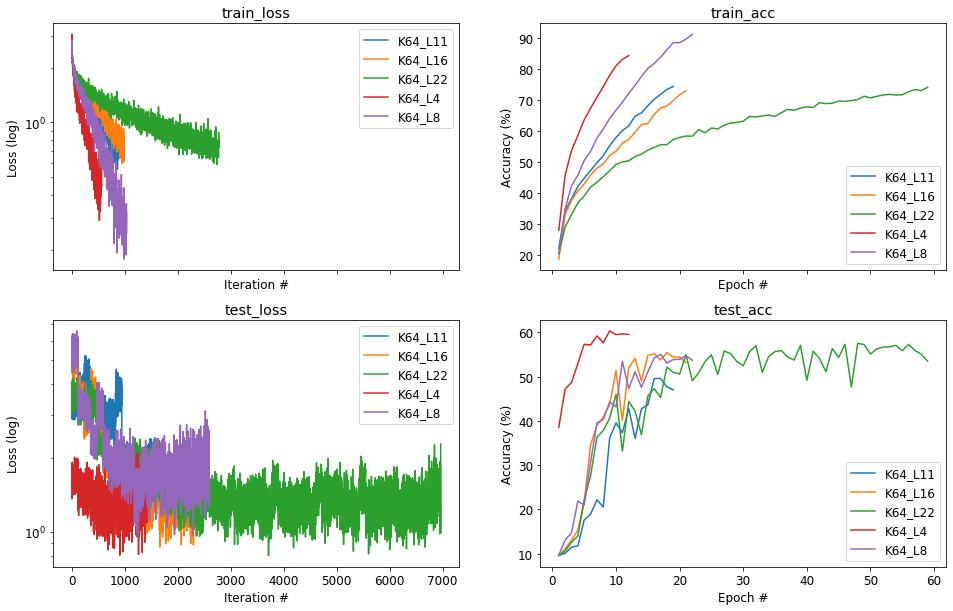

In [13]:
plot_exp_results('exp1_1_*.json') # plot your experiments results

In [5]:
# set ycn=True when you call experiments.run_experiment(...). 
# Use meaningful names!
# ====== YOUR CODE: ======

#hyper parameters
filter_count=64
pool_every = 2
layers_per_block = 4
hidden_layer_size = 100
hidden_layer_count = 2
batch_size = 256
epoch_num=100
lr=1e-3
filters_per_layer=[filter_count]
optimizer="Adam"
#hyper parameters

for l in [2,4,6]:
  hidden_dims=[hidden_layer_size]*l
  experiments.run_experiment(f'exp1_2_h100_l{l}',
                            bs_train=batch_size,
                            batches=10000,
                            epochs=epoch_num, 
                            early_stopping=3,
                            reg=2e-3,
                            lr=lr,
                            filters_per_layer=filters_per_layer,
                            layers_per_block=layers_per_block,
                            pool_every=pool_every,
                            hidden_dims=hidden_dims,
                            optimizer=optimizer,
                            momentum=0,
                            tol=1e-3,
                            ycn=True,
                            augmentation=False,
                            short_train=True)
# ========================

Files already downloaded and verified
Files already downloaded and verified
YourCodeNet(
  (feature_extractor): Sequential(
    (0): SkipConnectionLayer(
      (connection): Conv2d(3, 64, kernel_size=(1, 1), stride=(1, 1), padding=same)
      (layer): Sequential(
        (0): LeakyReLU(negative_slope=0.01)
        (1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
        (3): LeakyReLU(negative_slope=0.01)
        (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
      )
    )
    (1): Dropout(p=0.5, inplace=False)
    (2): SkipConnectionLayer(
      (connection): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), padding=same)
      (layer): Sequential(
        (0): LeakyReLU(negative_slope=0.01)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=s

common config:  {'run_name': 'exp1_2_h100_l6', 'out_dir': './results', 'seed': 2057784850, 'bs_train': 256, 'bs_test': 64, 'batches': 10000, 'epochs': 100, 'early_stopping': 3, 'checkpoints': None, 'lr': 0.001, 'reg': 0.002, 'optimizer': 'Adam', 'momentum': 0, 'pool_every': 2, 'hidden_dims': [100, 100, 100, 100, 100, 100], 'ycn': True, 'short_train': True, 'kw': {'tol': 0.001, 'augmentation': False}}


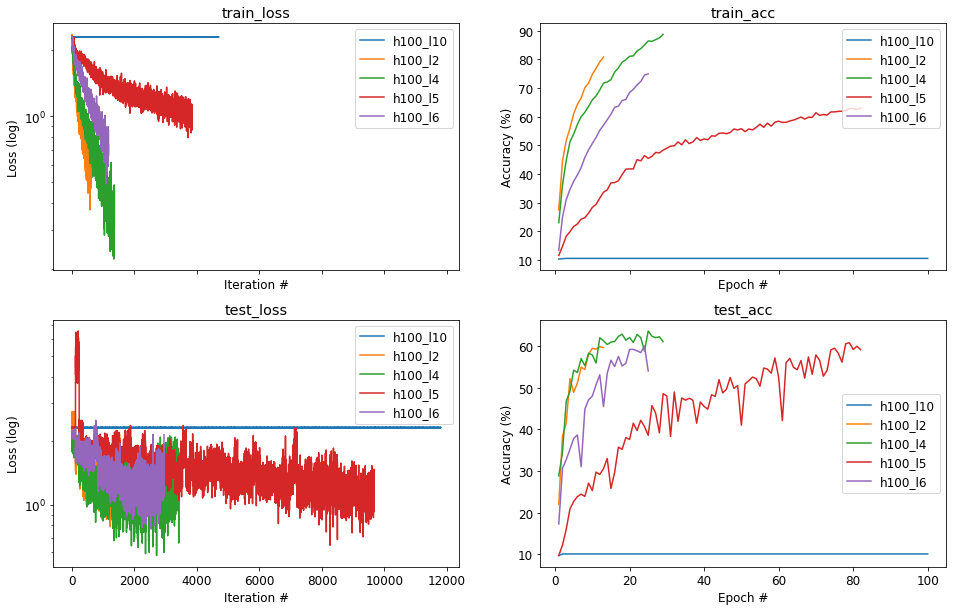

In [6]:
plot_exp_results('exp1_2_*.json') # plot your experiments results

In [7]:
# set ycn=True when you call experiments.run_experiment(...). 
# Use meaningful names!
# ====== YOUR CODE: ======

#hyper parameters
filter_count=64
pool_every = 2
layers_per_block = 4
hidden_layer_size = 100
hidden_layer_count = 4
batch_size = 256
epoch_num=100
lr=1e-3
filters_per_layer=[filter_count]
optimizer="Adam"
#hyper parameters

for l in [100,120,70]:
  hidden_dims=[l]*hidden_layer_count
  experiments.run_experiment(f'exp1_3_h{l}_l{hidden_layer_count}',
                            bs_train=batch_size,
                            batches=10000,
                            epochs=epoch_num, 
                            early_stopping=3,
                            reg=2e-3,
                            lr=lr,
                            filters_per_layer=filters_per_layer,
                            layers_per_block=layers_per_block,
                            pool_every=pool_every,
                            hidden_dims=hidden_dims,
                            tol=1e-3,
                            ycn=True,
                            optimizer="Adam",
                            momentum=0,
                            augmentation=False,
                            short_train=True)
# ========================

Files already downloaded and verified
Files already downloaded and verified
YourCodeNet(
  (feature_extractor): Sequential(
    (0): SkipConnectionLayer(
      (connection): Conv2d(3, 64, kernel_size=(1, 1), stride=(1, 1), padding=same)
      (layer): Sequential(
        (0): LeakyReLU(negative_slope=0.01)
        (1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
        (3): LeakyReLU(negative_slope=0.01)
        (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
      )
    )
    (1): Dropout(p=0.5, inplace=False)
    (2): SkipConnectionLayer(
      (connection): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), padding=same)
      (layer): Sequential(
        (0): LeakyReLU(negative_slope=0.01)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=s

common config:  {'run_name': 'exp1_3_h70_l4', 'out_dir': './results', 'seed': 386974609, 'bs_train': 256, 'bs_test': 64, 'batches': 10000, 'epochs': 100, 'early_stopping': 3, 'checkpoints': None, 'lr': 0.001, 'reg': 0.002, 'optimizer': 'Adam', 'momentum': 0, 'pool_every': 2, 'hidden_dims': [70, 70, 70, 70], 'ycn': True, 'short_train': True, 'kw': {'tol': 0.001, 'augmentation': False}}


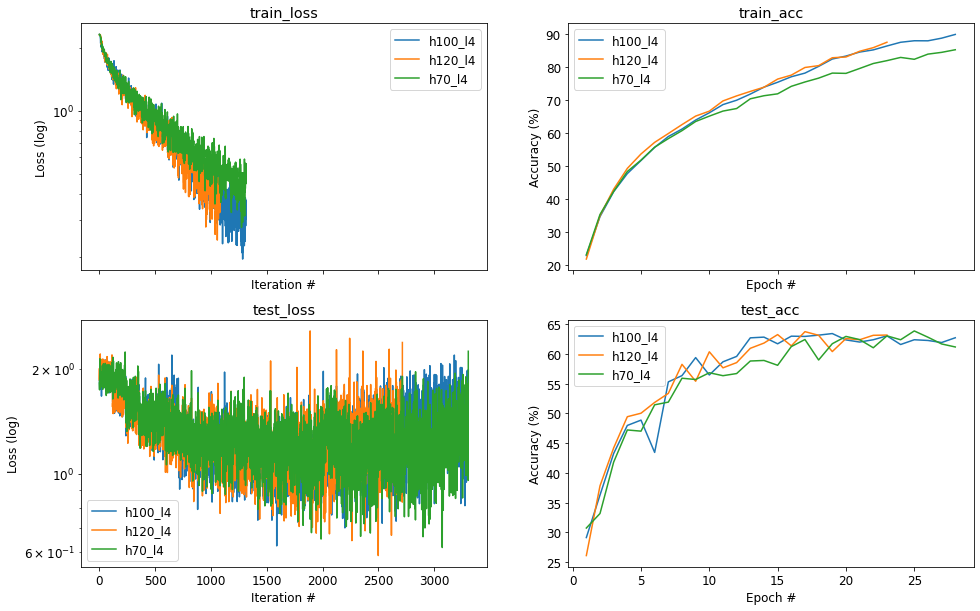

In [9]:
plot_exp_results('exp1_3_*l4.json') # plot your experiments results

### 2. Learning rate and optimization method
Tune the optimization algorithm (try SGD with momentum and Adam) and the learning rate (try values between 0.0005-1, try no more than five values).

In [10]:
# set ycn=True when you call experiments.run_experiment(...). 
# Use meaningful names!
# ====== YOUR CODE: ======

#hyper parameters
filter_count=64
pool_every = 2
layers_per_block = 4
hidden_layer_size = 120
hidden_layer_count = 4
batch_size = 256
epoch_num=100
lr=1e-3
filters_per_layer=[filter_count]
optimizer="Adam"
#hyper parameters

filters_per_layer=[filter_count]
hidden_dims=[hidden_layer_size]*hidden_layer_count

for optimizer in ["AdaGrad","SGDmomentum","SGD","Adam"]:
    for lr in [0.1,1e-2,5e-3,1e-3,5e-4]:
        experiments.run_experiment(f'exp2_1_lr{lr}_optim{optimizer}',
                            bs_train=batch_size,
                            batches=10000,
                            epochs=epoch_num, 
                            early_stopping=3,
                            reg=2e-3,
                            lr=lr,
                            filters_per_layer=filters_per_layer,
                            layers_per_block=layers_per_block,
                            pool_every=pool_every,
                            hidden_dims=hidden_dims,
                            tol=1e-3,
                            ycn=True,
                            optimizer=optimizer,
                            momentum=1 if optimizer=="SGDmomentum" else 0,
                            augmentation=False,
                            short_train=True)
# ========================

Files already downloaded and verified
Files already downloaded and verified
YourCodeNet(
  (feature_extractor): Sequential(
    (0): SkipConnectionLayer(
      (connection): Conv2d(3, 64, kernel_size=(1, 1), stride=(1, 1), padding=same)
      (layer): Sequential(
        (0): LeakyReLU(negative_slope=0.01)
        (1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
        (3): LeakyReLU(negative_slope=0.01)
        (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
      )
    )
    (1): Dropout(p=0.5, inplace=False)
    (2): SkipConnectionLayer(
      (connection): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), padding=same)
      (layer): Sequential(
        (0): LeakyReLU(negative_slope=0.01)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=s

common config:  {'run_name': 'exp2_1_lr0.1_optimSGDmomentum', 'out_dir': './results', 'seed': 668632239, 'bs_train': 256, 'bs_test': 64, 'batches': 10000, 'epochs': 100, 'early_stopping': 3, 'checkpoints': None, 'lr': 0.1, 'reg': 0.002, 'optimizer': 'SGDmomentum', 'momentum': 1, 'pool_every': 2, 'hidden_dims': [120, 120, 120, 120], 'ycn': True, 'short_train': True, 'kw': {'tol': 0.001, 'augmentation': False}}


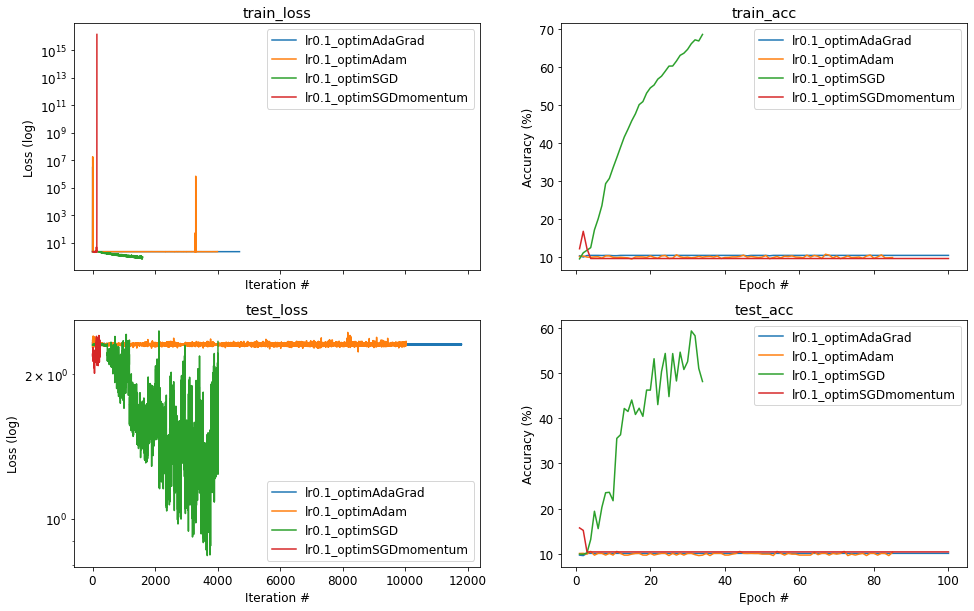

In [11]:
plot_exp_results("exp2_1_lr0.1*.json")

common config:  {'run_name': 'exp2_1_lr0.01_optimSGDmomentum', 'out_dir': './results', 'seed': 1743753470, 'bs_train': 256, 'bs_test': 64, 'batches': 10000, 'epochs': 100, 'early_stopping': 3, 'checkpoints': None, 'lr': 0.01, 'reg': 0.002, 'optimizer': 'SGDmomentum', 'momentum': 1, 'pool_every': 2, 'hidden_dims': [120, 120, 120, 120], 'ycn': True, 'short_train': True, 'kw': {'tol': 0.001, 'augmentation': False}}


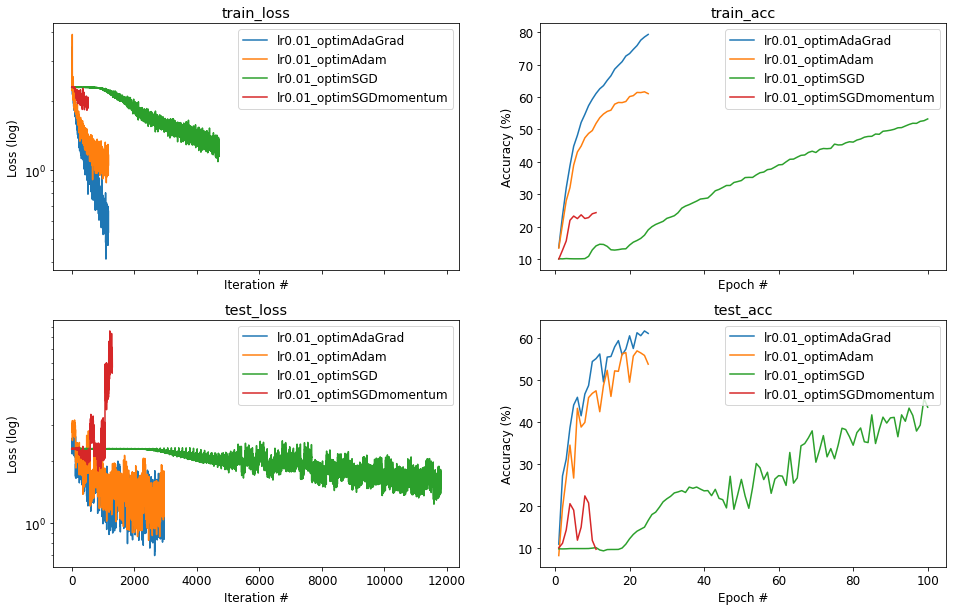

In [12]:
plot_exp_results("exp2_1_lr0.01*.json")

common config:  {'run_name': 'exp2_1_lr0.001_optimSGDmomentum', 'out_dir': './results', 'seed': 1114519989, 'bs_train': 256, 'bs_test': 64, 'batches': 10000, 'epochs': 100, 'early_stopping': 3, 'checkpoints': None, 'lr': 0.001, 'reg': 0.002, 'optimizer': 'SGDmomentum', 'momentum': 1, 'pool_every': 2, 'hidden_dims': [120, 120, 120, 120], 'ycn': True, 'short_train': True, 'kw': {'tol': 0.001, 'augmentation': False}}


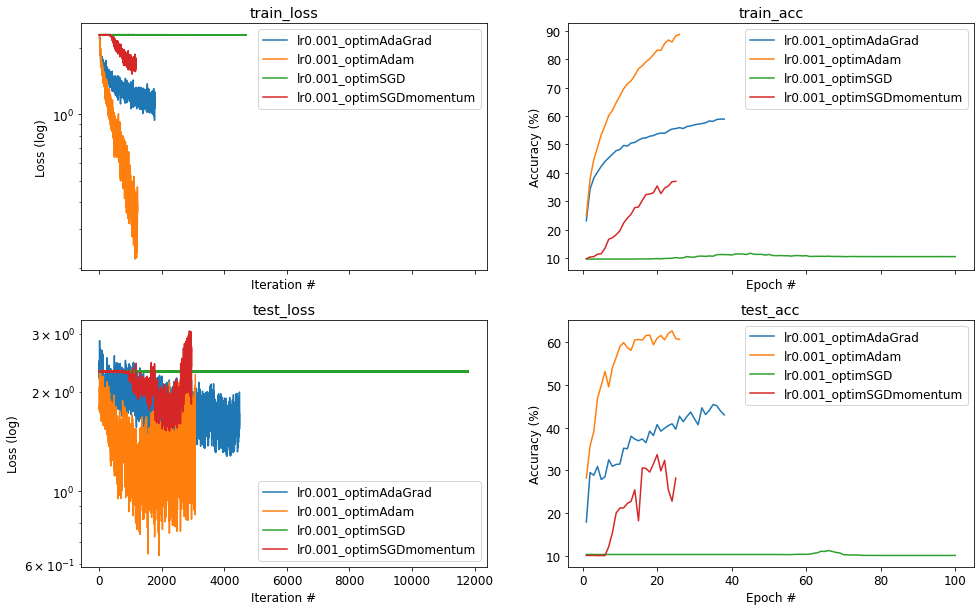

In [13]:
plot_exp_results("exp2_1_lr0.001*.json")

common config:  {'run_name': 'exp2_1_lr0.005_optimSGDmomentum', 'out_dir': './results', 'seed': 1046729959, 'bs_train': 256, 'bs_test': 64, 'batches': 10000, 'epochs': 100, 'early_stopping': 3, 'checkpoints': None, 'lr': 0.005, 'reg': 0.002, 'optimizer': 'SGDmomentum', 'momentum': 1, 'pool_every': 2, 'hidden_dims': [120, 120, 120, 120], 'ycn': True, 'short_train': True, 'kw': {'tol': 0.001, 'augmentation': False}}


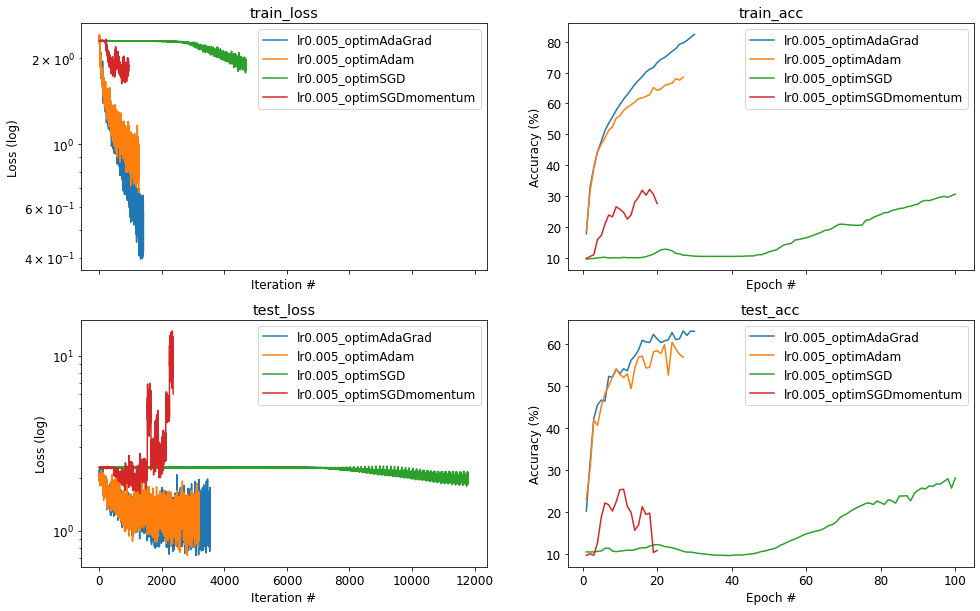

In [14]:
plot_exp_results("exp2_1_lr0.005*.json")

common config:  {'run_name': 'exp2_1_lr0.0005_optimSGDmomentum', 'out_dir': './results', 'seed': 937558105, 'bs_train': 256, 'bs_test': 64, 'batches': 10000, 'epochs': 100, 'early_stopping': 3, 'checkpoints': None, 'lr': 0.0005, 'reg': 0.002, 'optimizer': 'SGDmomentum', 'momentum': 1, 'pool_every': 2, 'hidden_dims': [120, 120, 120, 120], 'ycn': True, 'short_train': True, 'kw': {'tol': 0.001, 'augmentation': False}}


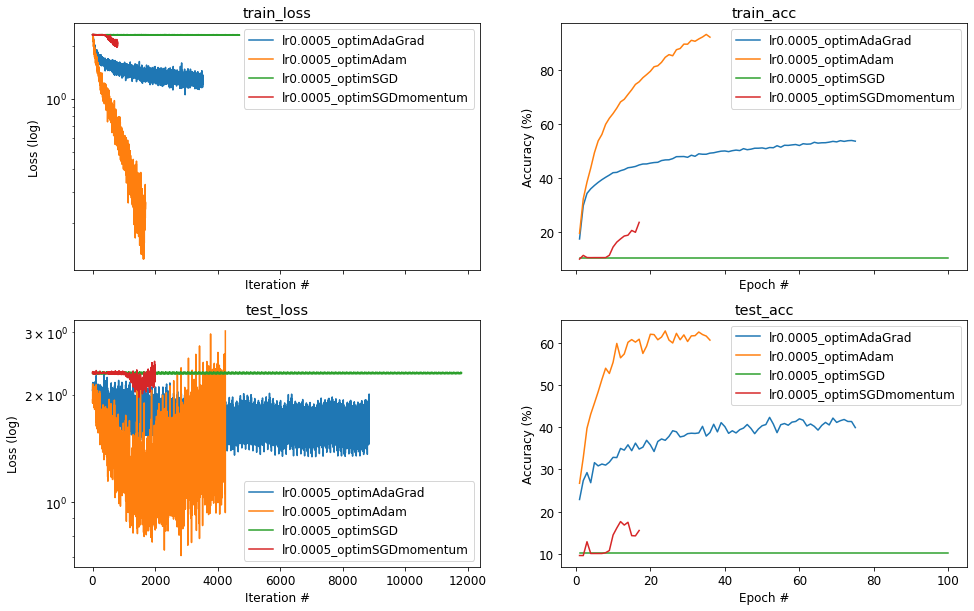

In [15]:
plot_exp_results("exp2_1_lr0.0005*.json")

common config:  {'run_name': 'exp2_1_lr0.01_optimAdam', 'out_dir': './results', 'seed': 529248147, 'bs_train': 256, 'bs_test': 64, 'batches': 10000, 'epochs': 100, 'early_stopping': 3, 'checkpoints': None, 'lr': 0.01, 'reg': 0.002, 'optimizer': 'Adam', 'momentum': 0, 'pool_every': 2, 'hidden_dims': [120, 120, 120, 120], 'ycn': True, 'short_train': True, 'kw': {'tol': 0.001, 'augmentation': False}}


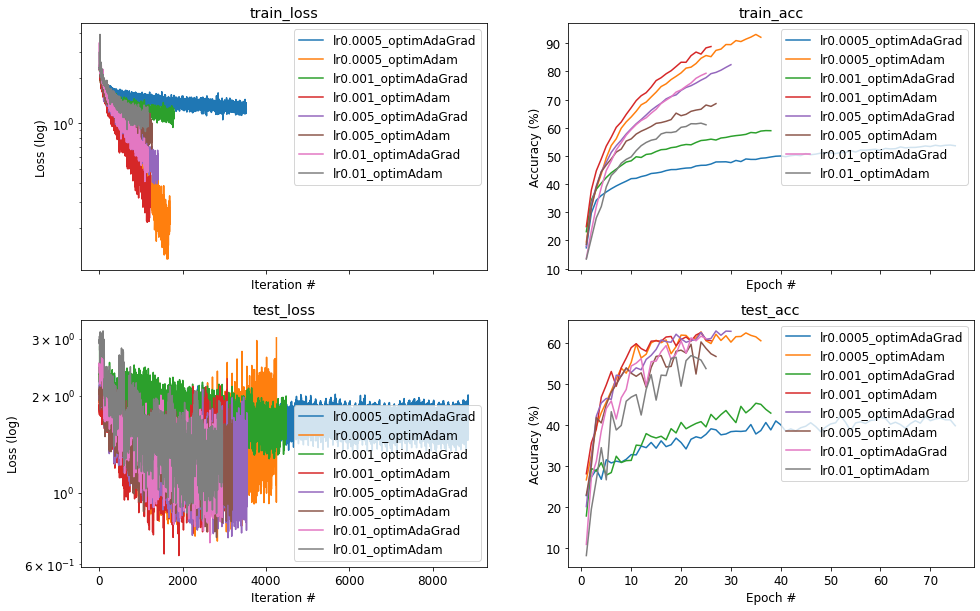

In [20]:
plot_exp_results("exp2_1_lr0.0*_optimAda*.json")

**Answer in your Report:** Why should we add the momentum to SGD? What is the main two improvments adam has comparing to the simple SGD? What was the best optimization algorithm and best learning rate you've found?

Summarize this section results in your report.

**Note** - you will need to change the optimization used in experiments.run_experiment(...).

### 3. Add Batch Normalization
Add batch normalization to your network. You may want to read this blog before:
https://www.baeldung.com/cs/batch-normalization-cnn

In [21]:
#hyper parameters
filter_count=64
pool_every = 2
layers_per_block = 4
hidden_layer_size = 120
hidden_layer_count = 4
batch_size = 256
epoch_num=100
lr=5e-3
filters_per_layer=[filter_count]
optimizer="AdaGrad"
#hyper parameters

filters_per_layer=[filter_count]
hidden_dims=[hidden_layer_size]*hidden_layer_count

experiments.run_experiment(f'exp3_1_best_params_so_far',
                    bs_train=batch_size,
                    batches=10000,
                    epochs=epoch_num, 
                    early_stopping=3,
                    reg=2e-3,
                    lr=lr,
                    filters_per_layer=filters_per_layer,
                    layers_per_block=layers_per_block,
                    pool_every=pool_every,
                    hidden_dims=hidden_dims,
                    tol=1e-3,
                    ycn=True,
                    optimizer=optimizer,
                    momentum=0,
                    augmentation=False,
                    short_train=False)
# ========================

Files already downloaded and verified
Files already downloaded and verified
YourCodeNet(
  (feature_extractor): Sequential(
    (0): SkipConnectionLayer(
      (connection): Conv2d(3, 64, kernel_size=(1, 1), stride=(1, 1), padding=same)
      (layer): Sequential(
        (0): LeakyReLU(negative_slope=0.01)
        (1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
        (3): LeakyReLU(negative_slope=0.01)
        (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
      )
    )
    (1): Dropout(p=0.5, inplace=False)
    (2): SkipConnectionLayer(
      (connection): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), padding=same)
      (layer): Sequential(
        (0): LeakyReLU(negative_slope=0.01)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=s

common config:  {'run_name': 'exp3_1_best_params_so_far', 'out_dir': './results', 'seed': 1052418973, 'bs_train': 256, 'bs_test': 64, 'batches': 10000, 'epochs': 100, 'early_stopping': 3, 'checkpoints': None, 'lr': 0.005, 'reg': 0.002, 'optimizer': 'AdaGrad', 'momentum': 0, 'pool_every': 2, 'hidden_dims': [120, 120, 120, 120], 'ycn': True, 'short_train': False, 'kw': {'tol': 0.001, 'augmentation': False}}


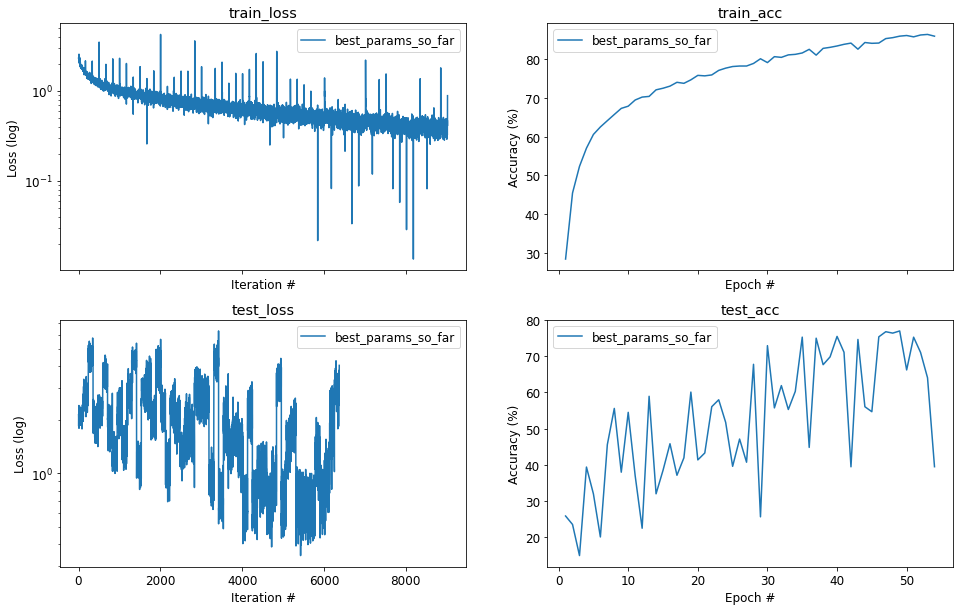

In [23]:
plot_exp_results('exp3_1_best_params_so_far.json')

in the previous exercise we added batch norm in the bonus part. so here we added batch norm from the start
this allowed us to try deeper networks

**Answer in your Report:** What is the purpose of batch normalization (why do we use it)? 
Did the Batch normalization improve the network preformance?
Summeraize this section results in your report.

### 4. Regularization
Try to add regularization to your optimization. In particular add L2, l1 regularization (read about weight_decay in adam) and dropout layer to your network (try them separately).

In [24]:
# run with l1 and diffrent alpha
# ====== YOUR CODE: ======
filter_count=64
pool_every = 2
layers_per_block = 4
hidden_layer_size = 120
hidden_layer_count = 4
batch_size = 256
epoch_num=100
lr=5e-3
filters_per_layer=[filter_count]
optimizer="AdaGrad"
#hyper parameters

filters_per_layer=[filter_count]
hidden_dims=[hidden_layer_size]*hidden_layer_count
for alpha in [0.1,1e-2,5e-3,1e-3,5e-4]:
    experiments.run_experiment(f"exp4_1_l1_alpha{alpha}",
                    bs_train=batch_size,
                    batches=10000,
                    epochs=epoch_num, 
                    early_stopping=3,
                    reg=alpha,
                    lr=lr,
                    filters_per_layer=filters_per_layer,
                    layers_per_block=layers_per_block,
                    pool_every=pool_every,
                    hidden_dims=hidden_dims,
                    tol=1e-3,
                    ycn=True,
                    optimizer=optimizer,
                    momentum=0,
                    l1=True,
                    augmentation=False,
                    short_train=True)
# ========================

Files already downloaded and verified
Files already downloaded and verified
YourCodeNet(
  (feature_extractor): Sequential(
    (0): SkipConnectionLayer(
      (connection): Conv2d(3, 64, kernel_size=(1, 1), stride=(1, 1), padding=same)
      (layer): Sequential(
        (0): LeakyReLU(negative_slope=0.01)
        (1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
        (3): LeakyReLU(negative_slope=0.01)
        (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
      )
    )
    (1): Dropout(p=0.5, inplace=False)
    (2): SkipConnectionLayer(
      (connection): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), padding=same)
      (layer): Sequential(
        (0): LeakyReLU(negative_slope=0.01)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=s

common config:  {'run_name': 'exp4_1_l1_alpha0.1', 'out_dir': './results', 'seed': 251378799, 'bs_train': 256, 'bs_test': 64, 'batches': 10000, 'epochs': 100, 'early_stopping': 3, 'checkpoints': None, 'lr': 0.005, 'reg': 0.1, 'optimizer': 'AdaGrad', 'momentum': 0, 'pool_every': 2, 'hidden_dims': [120, 120, 120, 120], 'ycn': True, 'short_train': True, 'kw': {'tol': 0.001, 'l1': True, 'augmentation': False}}


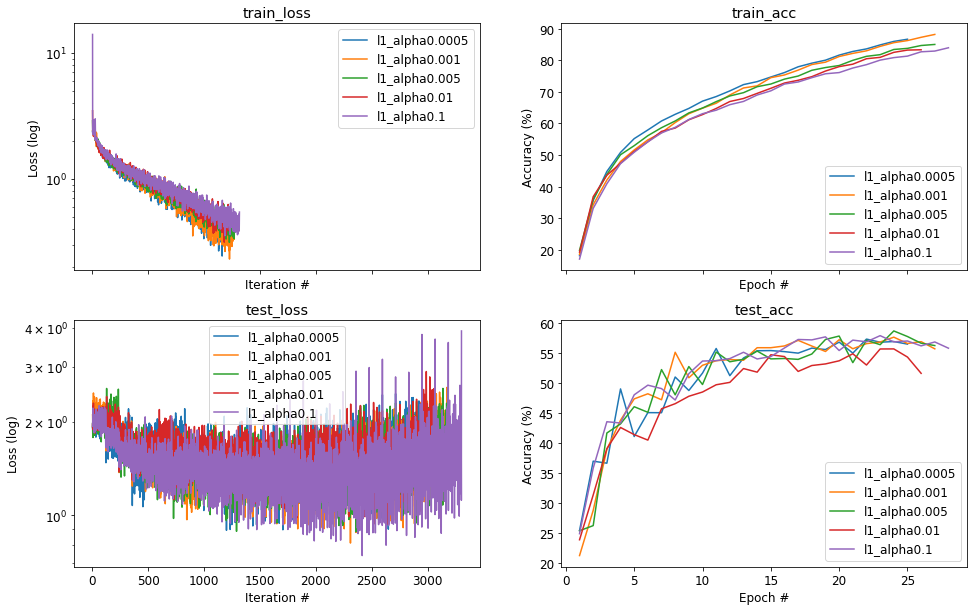

In [25]:
plot_exp_results('exp4_1_l1*.json') # plot your experiments results

In [26]:
# run with l1 and diffrent alpha
# ====== YOUR CODE: ======
filter_count=64
pool_every = 2
layers_per_block = 4
hidden_layer_size = 120
hidden_layer_count = 4
batch_size = 256
epoch_num=100
lr=5e-3
filters_per_layer=[filter_count]
optimizer="AdaGrad"
#hyper parameters

filters_per_layer=[filter_count]
hidden_dims=[hidden_layer_size]*hidden_layer_count
experiments.run_experiment(f"exp4_2_no_reg",
                    bs_train=batch_size,
                    batches=10000,
                    epochs=epoch_num, 
                    early_stopping=3,
                    reg=0,
                    lr=lr,
                    filters_per_layer=filters_per_layer,
                    layers_per_block=layers_per_block,
                    pool_every=pool_every,
                    hidden_dims=hidden_dims,
                    tol=1e-3,
                    ycn=True,
                    optimizer=optimizer,
                    momentum=0,
                    l1=False,
                    augmentation=False,
                    short_train=True)
# ========================

Files already downloaded and verified
Files already downloaded and verified
YourCodeNet(
  (feature_extractor): Sequential(
    (0): SkipConnectionLayer(
      (connection): Conv2d(3, 64, kernel_size=(1, 1), stride=(1, 1), padding=same)
      (layer): Sequential(
        (0): LeakyReLU(negative_slope=0.01)
        (1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
        (3): LeakyReLU(negative_slope=0.01)
        (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
      )
    )
    (1): Dropout(p=0.5, inplace=False)
    (2): SkipConnectionLayer(
      (connection): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), padding=same)
      (layer): Sequential(
        (0): LeakyReLU(negative_slope=0.01)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=s

common config:  {'run_name': 'exp4_2_no_reg', 'out_dir': './results', 'seed': 682492871, 'bs_train': 256, 'bs_test': 64, 'batches': 10000, 'epochs': 100, 'early_stopping': 3, 'checkpoints': None, 'lr': 0.005, 'reg': 0, 'optimizer': 'AdaGrad', 'momentum': 0, 'pool_every': 2, 'hidden_dims': [120, 120, 120, 120], 'ycn': True, 'short_train': True, 'kw': {'tol': 0.001, 'l1': False, 'augmentation': False}}


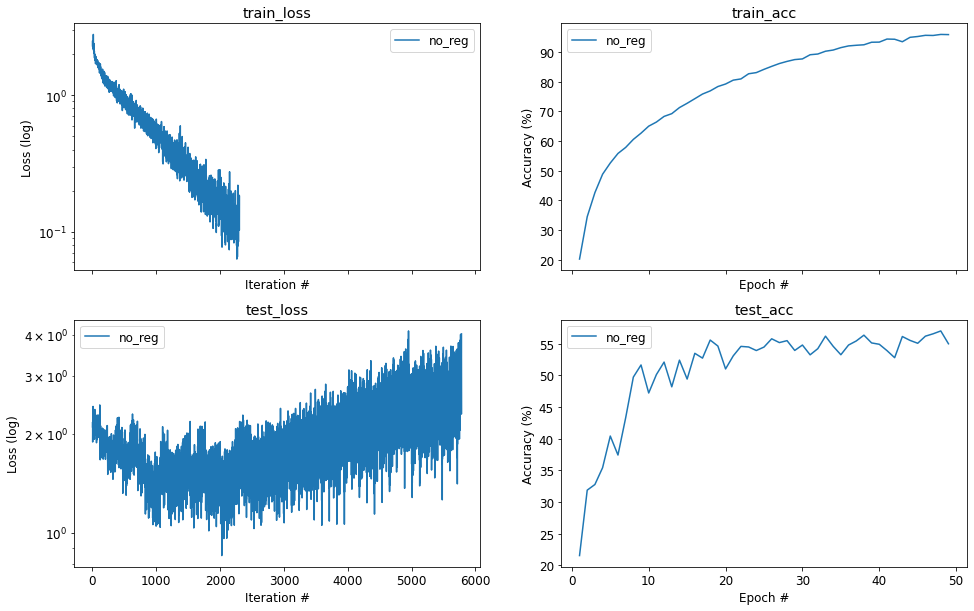

In [27]:
plot_exp_results("exp4_2*.json")

In [28]:
# run with l2 and diffrent alpha
# ====== YOUR CODE: ======
filter_count=64
pool_every = 2
layers_per_block = 4
hidden_layer_size = 120
hidden_layer_count = 4
batch_size = 256
epoch_num=100
lr=5e-3
filters_per_layer=[filter_count]
optimizer="AdaGrad"
#hyper parameters

filters_per_layer=[filter_count]
hidden_dims=[hidden_layer_size]*hidden_layer_count
for alpha in [0.1,1e-2,5e-3,1e-3,5e-4]:
    experiments.run_experiment(f"exp4_3_l2_alpha{alpha}",
                    bs_train=batch_size,
                    batches=10000,
                    epochs=epoch_num, 
                    early_stopping=3,
                    reg=alpha,
                    lr=lr,
                    filters_per_layer=filters_per_layer,
                    layers_per_block=layers_per_block,
                    pool_every=pool_every,
                    hidden_dims=hidden_dims,
                    tol=1e-3,
                    ycn=True,
                    optimizer=optimizer,
                    momentum=0,
                    l1=False,
                    augmentation=False,
                    short_train=True)
# ========================

Files already downloaded and verified
Files already downloaded and verified
YourCodeNet(
  (feature_extractor): Sequential(
    (0): SkipConnectionLayer(
      (connection): Conv2d(3, 64, kernel_size=(1, 1), stride=(1, 1), padding=same)
      (layer): Sequential(
        (0): LeakyReLU(negative_slope=0.01)
        (1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
        (3): LeakyReLU(negative_slope=0.01)
        (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
      )
    )
    (1): Dropout(p=0.5, inplace=False)
    (2): SkipConnectionLayer(
      (connection): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), padding=same)
      (layer): Sequential(
        (0): LeakyReLU(negative_slope=0.01)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=s

common config:  {'run_name': 'exp4_3_l2_alpha0.1', 'out_dir': './results', 'seed': 724624408, 'bs_train': 256, 'bs_test': 64, 'batches': 10000, 'epochs': 100, 'early_stopping': 3, 'checkpoints': None, 'lr': 0.005, 'reg': 0.1, 'optimizer': 'AdaGrad', 'momentum': 0, 'pool_every': 2, 'hidden_dims': [120, 120, 120, 120], 'ycn': True, 'short_train': True, 'kw': {'tol': 0.001, 'l1': False, 'augmentation': False}}


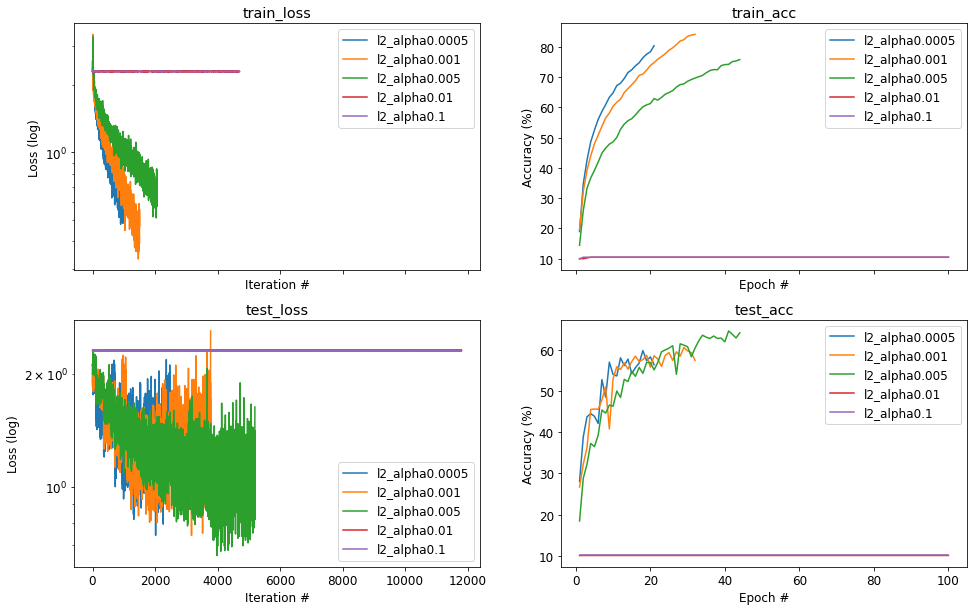

In [29]:
plot_exp_results("exp4_3_l2*.json")

common config:  {'run_name': 'exp4_4_full_test', 'out_dir': './results', 'seed': 1311190179, 'bs_train': 256, 'bs_test': 64, 'batches': 10000, 'epochs': 1, 'early_stopping': 3, 'checkpoints': 'best_no_aug', 'lr': 0.0005, 'reg': 0.01, 'optimizer': 'Adam', 'momentum': 0, 'pool_every': 8, 'hidden_dims': [100, 100], 'ycn': True, 'short_train': False, 'kw': {'tol': 0.001, 'augmentation': False, 'l1': False}}


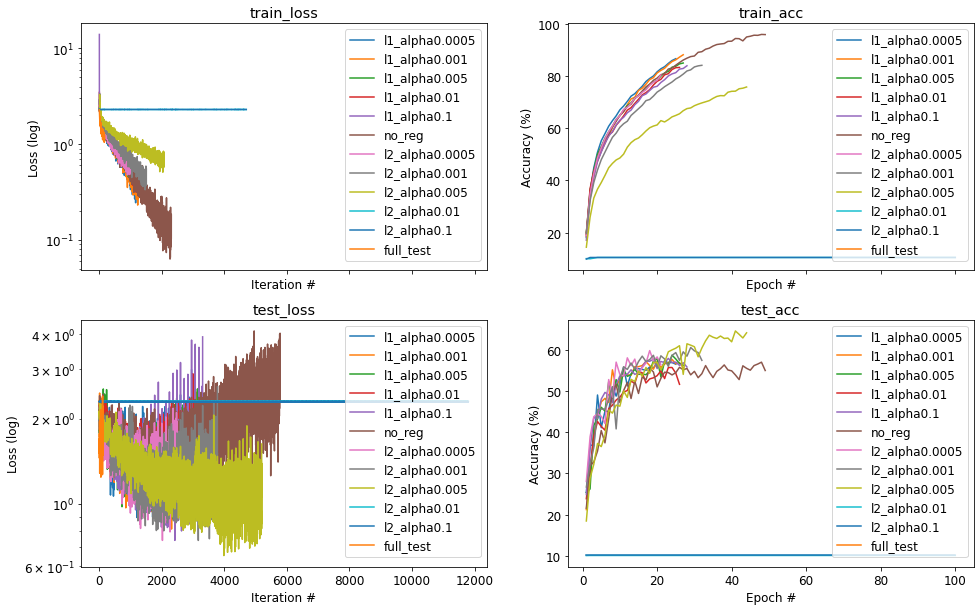

In [30]:
plot_exp_results("exp4_*.json")

**Answer in your Report:** Why should we use regularization?
How does the regularization affect the train accuracy and loss? How does it affect the val and test accuracy and loss? What was the best regulrization method? 
Summarize this section results in your report.

#### try full training with current parameters

In [32]:
# run with l1 and diffrent alpha
# ====== YOUR CODE: ======
filter_count=64
pool_every = 2
layers_per_block = 4
hidden_layer_size = 120
hidden_layer_count = 4
batch_size = 256
epoch_num=100
lr=5e-3
reg=5e-3
filters_per_layer=[filter_count]
optimizer="AdaGrad"
l1 = False
#hyper parameters

filters_per_layer=[filter_count]
hidden_dims=[hidden_layer_size]*hidden_layer_count
experiments.run_experiment(f"exp4_4_full_test",
                    bs_train=batch_size,
                    batches=10000,
                    epochs=epoch_num, 
                    early_stopping=3,
                    reg=reg,
                    lr=lr,
                    filters_per_layer=filters_per_layer,
                    layers_per_block=layers_per_block,
                    pool_every=pool_every,
                    hidden_dims=hidden_dims,
                    tol=1e-3,
                    ycn=True,
                    optimizer=optimizer,
                    augmentation=False,
                    momentum=0,
                    l1=l1,
                    checkpoints="best_no_aug",
                    short_train=False)
# ========================

Files already downloaded and verified
Files already downloaded and verified
YourCodeNet(
  (feature_extractor): Sequential(
    (0): SkipConnectionLayer(
      (connection): Conv2d(3, 64, kernel_size=(1, 1), stride=(1, 1), padding=same)
      (layer): Sequential(
        (0): LeakyReLU(negative_slope=0.01)
        (1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
        (3): LeakyReLU(negative_slope=0.01)
        (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
      )
    )
    (1): Dropout(p=0.5, inplace=False)
    (2): SkipConnectionLayer(
      (connection): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), padding=same)
      (layer): Sequential(
        (0): LeakyReLU(negative_slope=0.01)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=s

### 5.Use Data Augmentation
Now try data augmentation. Take a look at pytorch tutorial:
https://pytorch.org/vision/stable/transforms.html


In [33]:
# set ycn=True when you call experiments.run_experiment(...)
# Use meaningful names!
# ====== YOUR CODE: ======
# run with l1 and diffrent alpha
# ====== YOUR CODE: ======
filter_count=64
pool_every = 2
layers_per_block = 4
hidden_layer_size = 120
hidden_layer_count = 4
batch_size = 256
epoch_num=100
lr=5e-3
reg=5e-3
filters_per_layer=[filter_count]
optimizer="AdaGrad"
#hyper parameters

filters_per_layer=[filter_count]
hidden_dims=[hidden_layer_size]*hidden_layer_count
experiments.run_experiment(f"exp5_1_randomAugmentation",
                    bs_train=batch_size,
                    batches=10000,
                    epochs=epoch_num, 
                    early_stopping=3,
                    reg=reg,
                    lr=lr,
                    filters_per_layer=filters_per_layer,
                    layers_per_block=layers_per_block,
                    pool_every=pool_every,
                    hidden_dims=hidden_dims,
                    tol=1e-3,
                    ycn=True,
                    optimizer=optimizer,
                    momentum=0,
                    l1=False,
                    checkpoints="augmentation",
                    augmentation=True,
                    short_train=False)
# ========================

Files already downloaded and verified
Files already downloaded and verified
YourCodeNet(
  (feature_extractor): Sequential(
    (0): SkipConnectionLayer(
      (connection): Conv2d(3, 64, kernel_size=(1, 1), stride=(1, 1), padding=same)
      (layer): Sequential(
        (0): LeakyReLU(negative_slope=0.01)
        (1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
        (3): LeakyReLU(negative_slope=0.01)
        (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
      )
    )
    (1): Dropout(p=0.5, inplace=False)
    (2): SkipConnectionLayer(
      (connection): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), padding=same)
      (layer): Sequential(
        (0): LeakyReLU(negative_slope=0.01)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=s

common config:  {'run_name': 'exp5_1_randomAugmentation', 'out_dir': './results', 'seed': 2121605629, 'bs_train': 256, 'bs_test': 64, 'batches': 10000, 'epochs': 100, 'early_stopping': 3, 'checkpoints': 'augmentation', 'lr': 0.005, 'reg': 0.005, 'optimizer': 'AdaGrad', 'momentum': 0, 'pool_every': 2, 'hidden_dims': [120, 120, 120, 120], 'ycn': True, 'short_train': False, 'kw': {'tol': 0.001, 'l1': False, 'augmentation': True}}


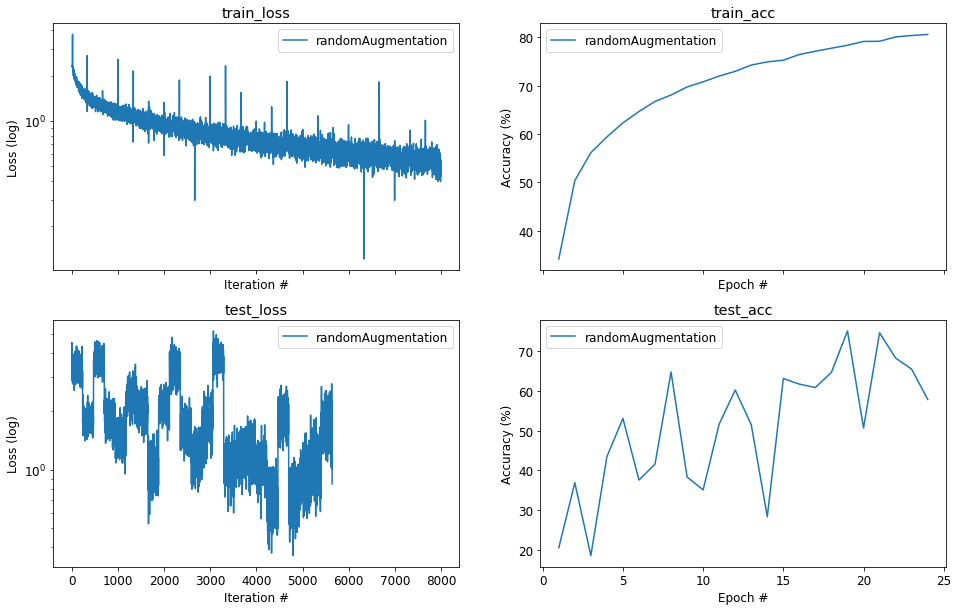

In [34]:
plot_exp_results('exp5_1_randomAugmentation.json') # plot your experiments results

**Answer in your Report:** Did the data augmentation improve the model preformace? Mention which augmentation you used and why.

## Summary Up To Here
**Answer in your Report:** What is your best architecture? what its best accuracy and loss on the test set? Compare your result to assignment 2. How did you mange to improve the model? Summarize this section results in your report. 

## Use predefined network
Read about ResNet in this blog:

https://towardsdatascience.com/an-overview-of-resnet-and-its-variants-5281e2f56035

**Summarize this blog in the report.** Be sure you answer this question:
1. What is the 'res' stand for in resnet?
2. What is the main innovative idea presented in resnet?
3. which probelm this unique architecture tring ro solve?



### 6. ResNet50 here to help
Use ResNet50, **without** pretraining (use pretrained=False when you load the model) and run this model on cifar 10.
you will need to change the last linear layer. Tip: use `model.fc = nn.Linear(2048, 10)` after you build the model.

You may want to read - https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html

**Note** - you will need to change the model used in experiments.run_experiment(...). 

In [5]:
import torchvision.models as models
# Use meaningful names!
# ====== YOUR CODE: ======
resnet = models.resnet50()
resnet.fc = torch.nn.Linear(2048,10,bias=True)
experiments.run_resnet("exp6_1_resnet_untrained",
                        model=resnet,
                        epochs=100,
                        checkpoints="exp6_1_resnet",
                        tol=1e-3)
# ========================

Files already downloaded and verified
Files already downloaded and verified
--- EPOCH 1/100 ---
test_batch (Avg. Loss 2.388, Accuracy 28.8): 100%|██████████| 235/235 [00:02<00:00, 91.01it/s]
epoches without improvement: 0
*** Saved checkpoint exp6_1_resnet.pt at epoch 1
--- EPOCH 2/100 ---
test_batch (Avg. Loss 3.278, Accuracy 29.2): 100%|██████████| 235/235 [00:02<00:00, 88.73it/s]
epoches without improvement: 1
*** Saved checkpoint exp6_1_resnet.pt at epoch 2
--- EPOCH 3/100 ---
test_batch (Avg. Loss 1.347, Accuracy 53.3): 100%|██████████| 235/235 [00:02<00:00, 89.42it/s]
epoches without improvement: 0
*** Saved checkpoint exp6_1_resnet.pt at epoch 3
--- EPOCH 4/100 ---
test_batch (Avg. Loss 1.669, Accuracy 44.6): 100%|██████████| 235/235 [00:02<00:00, 89.22it/s]
epoches without improvement: 1
--- EPOCH 5/100 ---
test_batch (Avg. Loss 1.255, Accuracy 55.7): 100%|██████████| 235/235 [00:02<00:00, 94.35it/s]
epoches without improvement: 0
*** Saved checkpoint exp6_1_resnet.pt at epoch 

common config:  {'run_name': 'exp6_1_resnet_untrained', 'out_dir': './results', 'seed': 227857214, 'bs_train': 128, 'bs_test': 32, 'batches': 100, 'epochs': 100, 'early_stopping': 3, 'checkpoints': 'exp6_1_resnet', 'lr': 0.001, 'reg': 0.001, 'optimizer': 'Adam', 'kw': {'tol': 0.001}}


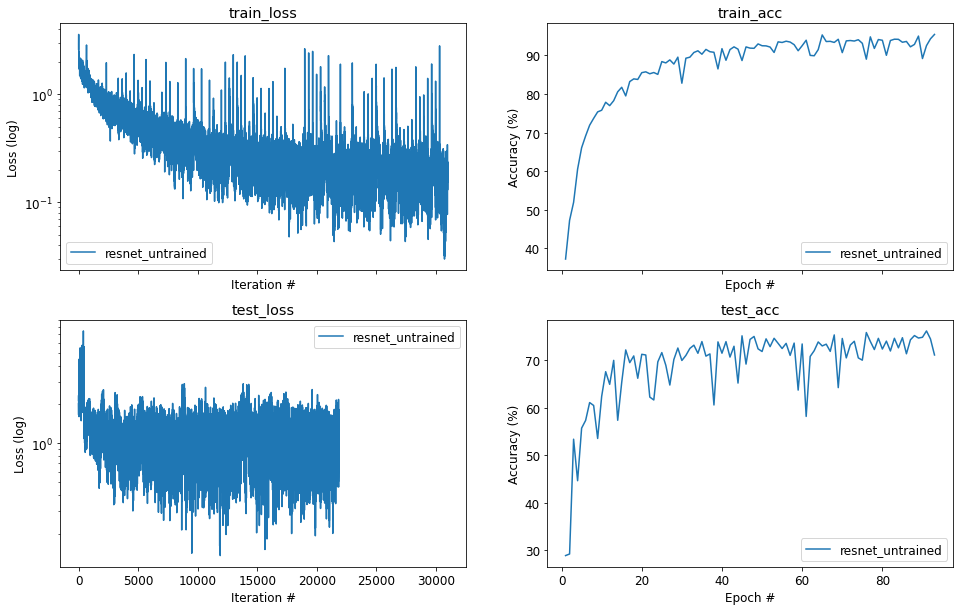

In [9]:
plot_exp_results('exp6_1_*.json') # plot your experiments results

**Answer in your Report:** What was ResNet50 accuracy and loss? Is it overfit/underfit/well-fit the data?
Summarize this section results in your report.

### 6. Pretrained ResNet50

Now use ResNet50 with pretraining (use pretrained=True when you load the model) and run this model on cifar 10.
you will need to change the last linear layer. Tip: `model.fc = nn.Linear(2048, 10)`. you may want to use lower learning rate.

In [11]:
import torchvision.models as models
# Use meaningful names!
# ====== YOUR CODE: ======
resnet = models.resnet50(pretrained=True)
resnet.fc = torch.nn.Linear(2048,10,bias=True)
experiments.run_resnet("exp6_2_resnet_pretrained",
                        model=resnet,
                        epochs=100,
                        checkpoints="exp6_2_resnet",
                        tol=1e-3)
# ========================

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/ronen/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

Files already downloaded and verified
Files already downloaded and verified
--- EPOCH 1/100 ---
test_batch (Avg. Loss 1.004, Accuracy 70.3): 100%|██████████| 235/235 [00:01<00:00, 133.09it/s]
epoches without improvement: 0
*** Saved checkpoint exp6_2_resnet.pt at epoch 1
--- EPOCH 2/100 ---
test_batch (Avg. Loss 0.950, Accuracy 71.5): 100%|██████████| 235/235 [00:01<00:00, 130.71it/s]
epoches without improvement: 0
*** Saved checkpoint exp6_2_resnet.pt at epoch 2
--- EPOCH 3/100 ---
test_batch (Avg. Loss 0.765, Accuracy 74.2): 100%|██████████| 235/235 [00:01<00:00, 122.98it/s]
epoches without improvement: 0
*** Saved checkpoint exp6_2_resnet.pt at epoch 3
--- EPOCH 4/100 ---
test_batch (Avg. Loss 0.709, Accuracy 76.3): 100%|██████████| 235/235 [00:01<00:00, 122.38it/s]
epoches without improvement: 0
*** Saved checkpoint exp6_2_resnet.pt at epoch 4
--- EPOCH 5/100 ---
test_batch (Avg. Loss 0.797, Accuracy 73.4): 100%|██████████| 235/235 [00:01<00:00, 121.39it/s]
epoches without improvem

In [ ]:
plot_exp_results('exp6_2_*.json') # plot your experiments results

**Answer in your Report:** What was the pretrained ResNet50 accuracy and loss? Is it overfit/underfit/well-fit the data? Has it got better accuracy than the non-pretrained ResNet? Summarize this section results in your report.

### 5. Extra Points - Exploring additional architectures
Try more achitectures. 
You may want to read this:
https://pytorch.org/vision/stable/models.html
You can choose if to use the pretrained version or not.

In [5]:
import torchvision.models as models
# Use meaningful names!
# ====== YOUR CODE: ======
model = torchvision.models.densenet121(pretrained=True)
model.classifier = torch.nn.Linear(1024,10)
experiments.run_resnet("exp6_3_densenet",
                        model,
                        epochs=100,
                        checkpoints="densenet",
                        tol=1e-3)
# ========================

Files already downloaded and verified
Files already downloaded and verified
--- EPOCH 1/100 ---
test_batch (Avg. Loss 0.745, Accuracy 74.6): 100%|██████████| 235/235 [00:03<00:00, 68.34it/s]
epoches without improvement: 0
*** Saved checkpoint densenet.pt at epoch 1
--- EPOCH 2/100 ---
test_batch (Avg. Loss 0.679, Accuracy 75.9): 100%|██████████| 235/235 [00:03<00:00, 67.04it/s]
epoches without improvement: 0
*** Saved checkpoint densenet.pt at epoch 2
--- EPOCH 3/100 ---
test_batch (Avg. Loss 1.078, Accuracy 66.1): 100%|██████████| 235/235 [00:03<00:00, 66.14it/s]
epoches without improvement: 1
--- EPOCH 4/100 ---
test_batch (Avg. Loss 0.618, Accuracy 78.7): 100%|██████████| 235/235 [00:03<00:00, 64.77it/s]
epoches without improvement: 0
*** Saved checkpoint densenet.pt at epoch 4
--- EPOCH 5/100 ---
test_batch (Avg. Loss 0.708, Accuracy 75.9): 100%|██████████| 235/235 [00:03<00:00, 65.63it/s]
epoches without improvement: 1
--- EPOCH 6/100 ---
test_batch (Avg. Loss 0.671, Accuracy 78.0

common config:  {'run_name': 'exp6_3_densenet', 'out_dir': './results', 'seed': 319609080, 'bs_train': 128, 'bs_test': 32, 'batches': 100, 'epochs': 100, 'early_stopping': 3, 'checkpoints': 'densenet', 'lr': 0.001, 'reg': 0.001, 'optimizer': 'Adam', 'trfs': None, 'kw': {'tol': 0.001}}


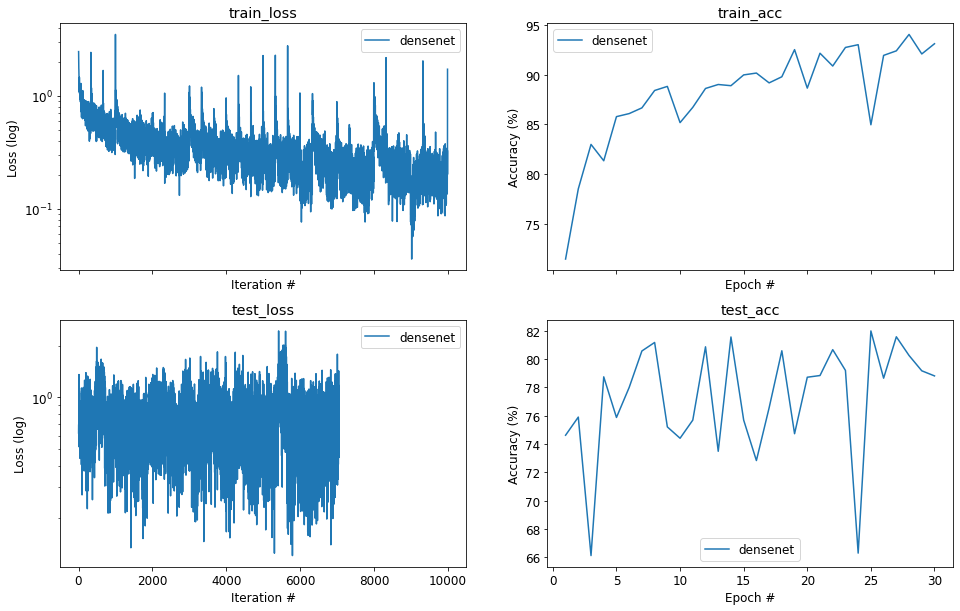

In [6]:
plot_exp_results('exp6_3_densenet.json')

**Answer in your Report:** What was the best pretrained architecture? Is it overfit/underfit/well fit the data? Summarize this section results in your report.

## Project Summary
**Answer in your Report:** Write a short summerization of your attempts. What worked for you? which architecture and hyperparameters led to the best preformance?